In [1]:
import tensorflow as tf
import matplotlib.pyplot as plot
import cv2
import os
import numpy as np
import numpy.ma as ma
# import squeezenet as sq
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model
# from squeezenet import SqueezeNet, SqueezeNet_11
confidence=0.8

glob_batch_Size = 32
glob_num_epochs = 15

learning_rate = 1e-4

image_size = (65,80)

#Dirs
train_dir = os.getcwd()+'/HandGesture/images/'
# test_dir = os.getcwd()+'/GestureRecognition/HandGesture/images/'
# val_dir = 'C:/Users/anarc/Documents/Code/Machine Learning/GestureRecognition/'



#CNN dim sizes
hidden_dim1=128
hidden_dim2=64

In [9]:
#Split from validation set from dataset, add variance
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.1, #remove this and create seperate validation ImageDataGenerator if dataset already split
                                   horizontal_flip=True,
                                   rotation_range=30) # set validation split


In [10]:
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = glob_batch_Size,
    subset='training') # set as training data

validation_dataset = train_datagen.flow_from_directory(
    train_dir, # same directory as training data (unless dataset pre-split, in which case remove both subset fields and replace train_dir with val_dir)
    target_size = image_size,
    batch_size = glob_batch_Size,
    subset='validation') # set as validation data

Found 4724 images belonging to 10 classes.
Found 519 images belonging to 10 classes.


In [55]:
# Classes paired with their indices
train_dataset.class_indices

{'call_me': 0,
 'fingers_crossed': 1,
 'okay': 2,
 'paper': 3,
 'peace': 4,
 'rock': 5,
 'rock_on': 6,
 'scissor': 7,
 'thumbs': 8,
 'up': 9}

In [4]:
# Define Conv Neural Net
model = tf.keras.models.Sequential([
                ## 1st Convolution layer, 32 filters, kernel size of 1x1, relu activation, with input of image_sizex, image_sizey, image_depth(RGB - 3)
                tf.keras.layers.Conv2D(32, kernel_size=1, activation='relu', input_shape=(image_size[0], image_size[1], 3)),
                ## 2nd Convolution layer
                tf.keras.layers.Conv2D(filters=32, kernel_size=5, activation='relu'),
                ## Max pooling, pool size of 2x2
                tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                ## Flatten layer
                tf.keras.layers.Flatten(),
                ## 1st Fully connected layer, output size of hidden_dim1, relu activation
                tf.keras.layers.Dense(hidden_dim1, activation="relu"),
                ## Dropout layer, dropout rate of 0.3
                tf.keras.layers.Dropout(rate=0.3),
                ## 2nd Fully connected layer, output size of hidden_dim2, relu activation
                tf.keras.layers.Dense(hidden_dim2, activation="relu"),
                ## Dropout layer, dropout rate of 0.3
                tf.keras.layers.Dropout(rate=0.3),
                ## 3rd and final Fully connected layer, output size of num classes (20), softmax activation
                tf.keras.layers.Dense(10, activation="softmax") ])

In [5]:
# Compile Model
model.compile(loss = 'categorical_crossentropy', 
              optimizer = tf.keras.optimizers.Adam(learning_rate), # controls learning rate
              metrics = ['accuracy']) # metric to improve

In [62]:
# Fit Model
model_fit = model.fit(train_dataset,
                      batch_size=glob_batch_Size,
                      epochs = glob_num_epochs,
                      validation_data = validation_dataset)

Epoch 1/15
  1/148 [..............................] - ETA: 1:23 - loss: 0.6922 - accuracy: 0.8125

KeyboardInterrupt: 

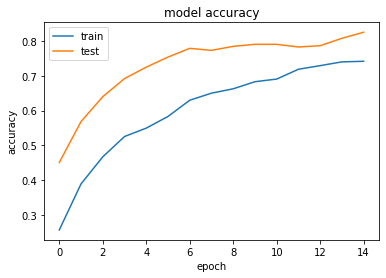

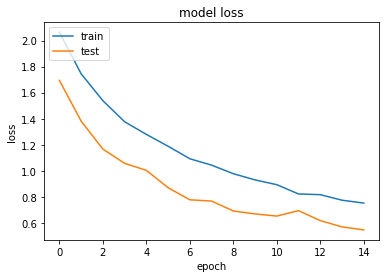

In [63]:
##Plotting
# summarize history for accuracy
plot.plot(model_fit.history['accuracy'])
plot.plot(model_fit.history['val_accuracy'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper left')
plot.show()
# summarize history for loss
plot.plot(model_fit.history['loss'])
plot.plot(model_fit.history['val_loss'])
plot.title('model loss')
plot.ylabel('loss')
plot.xlabel('epoch')
plot.legend(['train', 'test'], loc='upper left')
plot.show()
# Gap between train/test due to dropout layer

In [42]:
def loadTestPredict(_path):
    #Load
    img = image.load_img(_path, target_size = (65,80,3) )
    #Render
    plot.imshow(img)
    plot.show()
    
    
    np_image_data = np.asarray(img)
    np_final = np.expand_dims(np_image_data,axis = 0)
    #adds the None(on axis 0) dimensions that the model is expecting
    images = np.vstack([np_final])
    # adds the three channels of "color" (on axis 3) that the model is expecting
    # images = np.stack([images,images,images], axis = 3)
    
    
    #Convert to format
    # X = image.img_to_array(img)
    # X = np.expand_dims(X, axis = 0)
    # images = np.vstack([X])
    #Predict
    prediction = model.predict(images)
    #Print & Return
    print(prediction)
    # highestConfidence = np.amax(prediction)
    # classOfHighest = poses[np.argmax(prediction)]
    # print(classOfHighest,':  ',highestConfidence)
    return prediction

In [56]:
# Save Model
model.save(os.getcwd()+'model/model_batch'+ str(glob_batch_Size) +'_epochstr'+str(glob_num_epochs)+'_n'+str(hidden_dim1)+'.h5') 